In [1]:
import numpy as np
import pickle
import os, sys
sys.path.append(os.path.dirname(os.getcwd()) + '/source')
import sympy

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (12, 8)
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['figure.autolayout'] = True
np.random.seed(0)

In [2]:
# Model parameters
δ = 0.01
η = 0.032
median = 1.75/1000
h_hat = 0.2
σ_n = 1.2
γ_low = 0.012
γ_high = 0.024
ξ = 8*δ*η

In [3]:
ξ

0.00256

In [4]:
γ_base = 0.018

In [5]:
with open("../data/pulse_experiment", "rb") as f:
    λ_u = pickle.load(f)

λ_u = np.mean(λ_u, axis=0)

In [6]:
def simulate_log_damage(λ, σ_n, Et, Ws):
    """
    Simulate log damage.

    Parameters
    ----------
    exp_avg_response, σ_n : float
        Model parameters.
    Et : (T, ) ndarray
        Emission trajectory.
    Ws : (N, T) ndarray
        Iid normal shocks for N paths.

    Returns
    -------
    Ys : (T, ) ndarray
        Simulated log damages.

    """
    
    Ys = np.zeros(Ws.shape)
    for path in range(Ws.shape[0]):
        Y = 0.
        for i in range(Ws.shape[1]):
            dY = λ[i] * Et[i] * (1+σ_n*Ws[path,i])
            Ys[path, i] = dY + Y
            Y = Ys[path, i]
    
    return Ys

In [7]:
def plot_N(N, W):
    path, T = W.shape
    for p in range(path):
        plt.plot(N[p], label = str(p))

In [8]:
def simulate_log_damage_with_drift(λ, σ_n, Et, Ht, Ws, with_drift = True):
    """
    Simulate log damage.

    Parameters
    ----------
    exp_avg_response, σ_n : float
        Model parameters.
    Et : (T, ) ndarray
        Emission trajectory.
    Ws : (N, T) ndarray
        Iid normal shocks for N paths.

    Returns
    -------
    Ys : (T, ) ndarray
        Simulated log damages.

    """
    
    Ys = np.zeros(Ws.shape)
    if with_drift:
        for path in range(Ws.shape[0]):
            Y = 0.
            for J in range(Ws.shape[1]):
                log_N = 0.
                for j in range(J):
                    log_N += λ[j] * Et[J-j] * (1+σ_n*(Ws[path,J-j] + Ht[J-j]))
                
                Ys[path, J] = log_N
                
                
    else:
        for path in range(Ws.shape[0]):
            Y = 0.
            for J in range(Ws.shape[1]):
                log_N = 0.
                for j in range(J):
                    log_N += λ[j] * Et[J-j] * (1+σ_n*Ws[path,J-j])
                
                Ys[path, J] = log_N
                
            
    return Ys

W1m = np.random.normal(0., 1., (100_000, T))

log_N_low1m = simulate_log_damage(λ_low, σ_n, e_low_102, W1m)

N_low1m = np.exp(log_N_low1m)

In [9]:
with open("../data/base_8", "rb") as f:
    base_8 = pickle.load(f)

In [10]:
e_base = base_8["e_base1"]
e_base05 = base_8["e_base05"]

λ_base = λ_u*γ_base
# sigma_n = 1.2, xi = 0.00256
e_base_102 = e_base[:102]
e_base05_102 = e_base05[:102]

In [11]:
h_hat_base = e_base*median*γ_base*σ_n/(ξ*1)
h_hat_base05 = e_base05*median*γ_base*σ_n/(ξ*.5)*1.75*σ_n

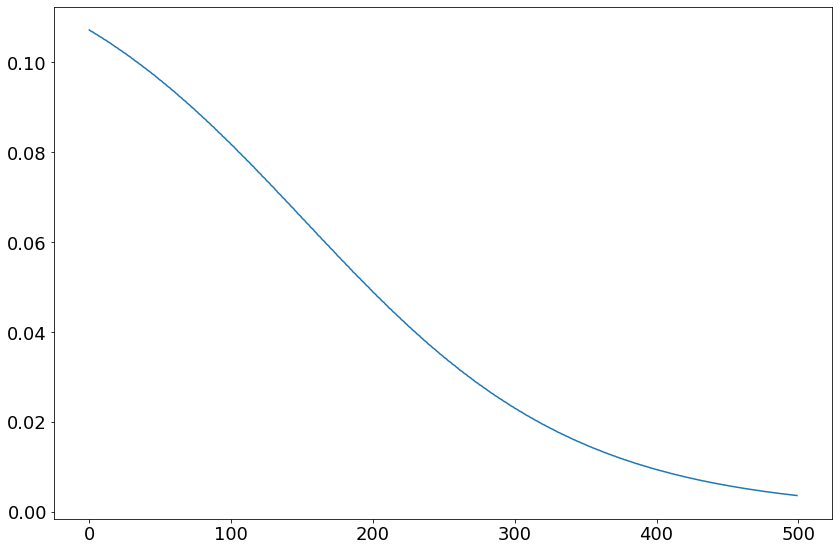

In [12]:
plt.plot(h_hat_base)

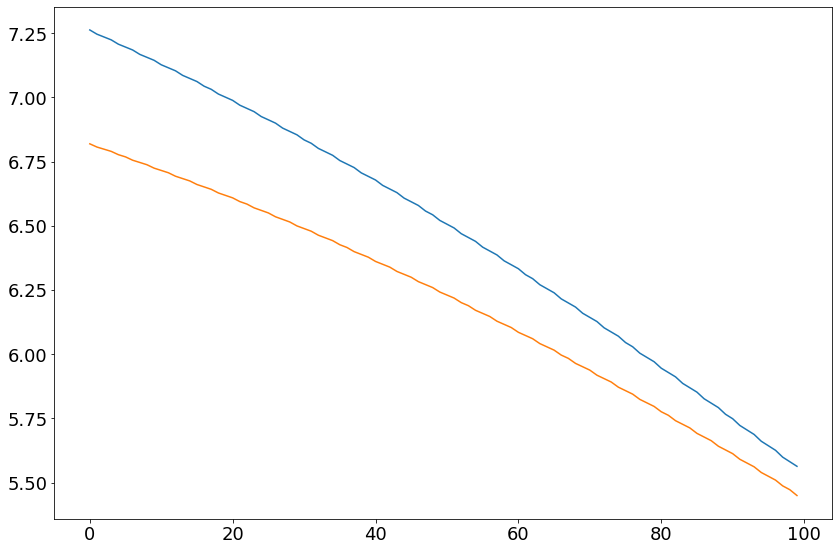

In [13]:
plt.plot(e_base[:100])
plt.plot(e_base05[:100])

Text(0, 0.5, 'emission')

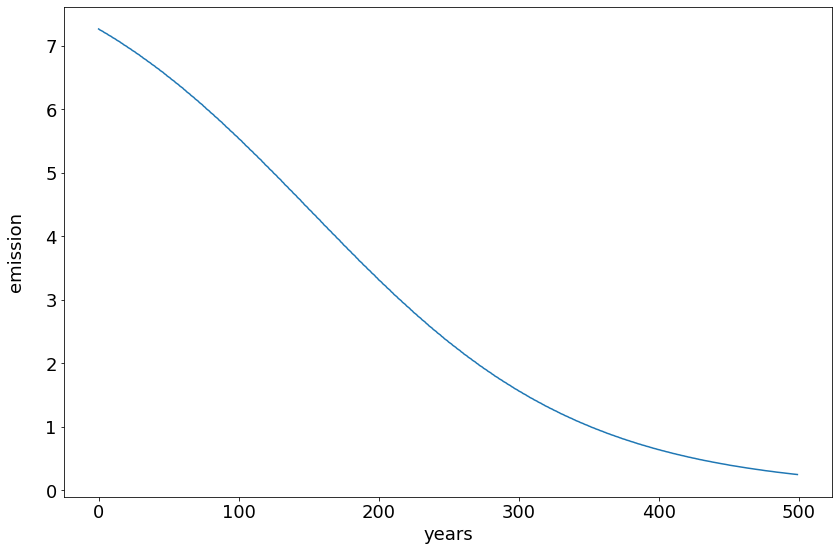

In [14]:
plt.plot(e_base)
# plt.plot(e_base05_102)
plt.xlabel("years")
plt.ylabel("emission", labelpad=20)
# plt.savefig("ems_quantile,png")

### SCC simulation
$X_t = (\log K_t, Z_t, \log N_t)'$ 

\begin{equation}
\begin{aligned}
    - \frac{\delta}{\alpha - i/k} + 1 - \kappa (i/k) = 0 
\end{aligned}
\end{equation}
All annual data:
$$
\alpha = .2, \quad \delta = .008, \quad \kappa = 7
$$

$$
i/k = .127
$$
and is rounded to .125.

SCC is computed according to:
$$
    SCC_t = \frac{\eta[\alpha - i/k] K_t}{ ( 1 - \eta) E_t N_t}
$$

where
$$
  d\log{K_t} = [\mu_k(Z_t) + i/k - \frac{\kappa}{2}(i/k)^2 - \frac{|\sigma_k|^2}{2}]dt + \sigma_k(Z_t)dW_t  
$$
Where initial value:
$$
    \log{K_0} = 80/\alpha 
$$

$$
    \mu_k(z) = - .05 + .04 \cdot z
$$

$$
\sigma_k(z)' = (.019, 0, 0) 
$$

$Z_t$ process:
$$
dZ_t = \mu_z(Z_t) dt + \sigma_z(Z_t) dW_t
$$
Where
$$
\mu_z(z) = - .056z
$$

$$
\sigma_z(z)' = (.044, .1, 0) 
$$

$\log{N_t}$ process:
$$
dlogN_t^1 = \iota' Y_t
$$
and
$$
dY_t = \Lambda Y_t dt + \Theta (E_t + E_t \sigma_n dW)
$$

$$
\sigma_n(z) = \lambda E \sigma_n
$$

dW = np.random.normal(0, 1, size=(3, 1000, 102))
dW[:,0, 0]
with open("dW_0211", "wb") as f:
    pickle.dump(dW,f)

dW = pickle.load(open("dW_0211", "rb"))

In [ ]:
# set time
T  = 102
size = 500_000

In [ ]:
dW = np.random.normal(0,1, (3, size, T))

In [ ]:
sigma_z = np.array([.022, .05, 0])
np.dot(sigma_z, dW[:,0, 0])

In [ ]:
alpha = 0.2
eta = .032
kappa = 7
delta = .008
invkap = .125

alpha_z = 0
beta_z = .014

In [ ]:
sig_z = np.sqrt((sigma_z[0]**2 + sigma_z[1]**2)/(1 - (1-.056)**2))
sig_z

In [20]:
def simulate_z(dW, z0, alpha_z, beta_z, sigma_z, Ht=0, dt=1):
    _, path, time = dW.shape
    zt = np.zeros((path, time))
    zt[:, 0] = z0
    z = z0
    for t in range(time-1):
        dz = (alpha_z - beta_z*z)*dt+ np.dot(sigma_z*dt, Ht + dW[:, :, t])
        z = dz + z
        zt[:,t+1] = z
    return zt

In [ ]:
z0 = np.random.normal(0, sig_z, size=(size))

In [ ]:
sigma_z = np.array([.022, .05, 0])
zt = simulate_z(dW, z0, 0, .056, sigma_z)

In [ ]:
for p in range(40):
    plt.plot(zt[p])
plt.xlabel('year')
plt.ylabel(r'$Z_t$', rotation=0)
# plt.savefig('z_t.png')

In [21]:
def simulate_logkapital( invkap, dW, zt, alpha_k, beta, sigma_k, kappa, k0, Ht=0, T=102,):
    _, path, time = dW.shape
    Kt = np.zeros((path, time))
    i = invkap
     # log capital
    Kt[:, 0] = np.log(k0)
    k = np.log(k0)*np.ones(path)
    for t in range(time-1):
        k +=   alpha_k + beta*zt[:,t] + i - kappa/2*i**2 - .5*sigma_k[0]**2 + np.dot(sigma_k, Ht + dW[:, :, t])
        Kt[:,t+1] = k

    return Kt

In [ ]:
alpha_k = - .05
beta = .01
sigma_k = np.array([.0095, 0, 0])
k0 = 80/alpha

In [ ]:
logKt = simulate_logkapital(invkap, dW, zt, alpha_k, beta, sigma_k, kappa, k0)

In [ ]:
for p in range(10):
    plt.plot(logKt[p])
plt.xlabel('years')
plt.ylabel(r'$\logK_t$', rotation=0, labelpad=30)
# plt.savefig('k_t.png')

In [ ]:
logk10 = np.zeros(102)
logk33 = np.zeros(102)
logk50 = np.zeros(102)
logk67 = np.zeros(102)
logk90 = np.zeros(102)
for t in range(102):
    logk10[t] = np.quantile(logKt[:,t], .1)
    logk33[t] = np.quantile(logKt[:,t], .33)
    logk50[t] = np.quantile(logKt[:,t], .5)
    logk67[t] = np.quantile(logKt[:,t], .67)
    logk90[t] = np.quantile(logKt[:,t], .9)

In [ ]:
quantileList = [.1, .33, .5, .67, .9]

In [32]:
def get_quantile(simulation, quantileList=[.1, .33, .5, .67, .9]):
    quantileDict = dict()
    for quantile in quantileList:
        quantileDict[quantile] = np.quantile(simulation, quantile, axis=0)
        
    return quantileDict

In [ ]:
logkDict = get_quantile(logKt)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(logkDict[quantile], label = quantile)
    
plt.legend()

In [22]:
def simulate_logn_withdrift(ems, lambda_u, sigma_n, dW, H = np.zeros(size)):
    _, path, time = dW.shape
    lognt = np.zeros((path, time))
    
    
    for T in range(time):
        log_n = np.zeros(path)
        for t in range(T):
            log_n += lambda_u[t] * ems[T-t] * (1+ np.dot(sigma_n, H[T-t] + dW[:, : ,T-t]) )
        lognt[:, T] = log_n
    return lognt

In [ ]:
# dW = np.random.normal(0,1, size=(3,10000,102))
sigma_n = np.array([0, 0, 1.2])
# dW = np.random.normal(0,1, size=(3,1_000_000,102))
log_nt = simulate_logn_withdrift(e_base, λ_base/1000, sigma_n, dW)

In [ ]:
for p in range(10):
    plt.plot(log_nt[p])

In [ ]:
logn = dict()
for quantile in [.1, .33, .5, .67, .9]:
    logn[quantile] = np.quantile(log_nt, quantile, axis=0)

In [ ]:
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile]*100, label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel("$\log{N_t}$\n (scaled by 100)", rotation=0, labelpad=65)
# plt.savefig("logn_quantile.png")

In [23]:
def simulate_scc(invkap, Kt, et, lognt, alpha, delta, eta):
    path, time = Kt.shape
    scct = np.zeros((path, time))
    inv = invkap
    for p in range(path):
        scct[p] = eta*(alpha - inv)*np.exp(Kt[p])/((1 - eta)*et*np.exp(lognt[p]))*1000
    return scct

In [ ]:
scc_base = simulate_scc(invkap, logKt, e_base[:102], log_nt, alpha, delta, eta )

In [ ]:
for p in range(40):
    plt.plot(scc_base[p])
plt.xlabel('years')
plt.ylabel(r'$scc$', rotation=0, labelpad=10)
# plt.savefig('scc_t.png')

In [ ]:
scc_quantile = dict()
for quantile in [.1, .33, .5, .67, .9]:
    scc_quantile[quantile] = np.quantile(scc_base, quantile, axis=0)

In [ ]:
fig = plt.figure(figsize = (12, 20))
plt.subplot(311)
plt.plot(logk90, label = "0.9 quantile")
plt.plot(logk67, label = "0.67 quantile")
plt.plot(logk50, label = "0.5 quantile")
plt.plot(logk33, label = "0.33 quantile")
plt.plot(logk10, label = "0.1 quantile")
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{K_t}$", rotation=0, labelpad=30)
plt.title("log capital, shocks to capital and damage")
# plt.savefig("logk_quantile.png")
plt.subplot(312)
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile]*100, label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel("$\log{N_t}$ \n (scaled by 100)", rotation=0, labelpad=70)
plt.title("log damage, shocks to capital and damage")
# plt.savefig("logn_quantile.png")
plt.subplot(313)
for quantile in [.9, .67, .5, .33, .1]:
    plt.plot(scc_quantile[quantile], label = "{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel("SCC", rotation=0, labelpad=30)
plt.title("SCC, shocks to capital and damage")
plt.savefig("../figures/shock_capital_dmg.png")

In [24]:
def simulate_scc_non(invkap, logKt, et, lognt, alpha, delta, eta):
    path, time = logKt.shape
    scct = np.zeros((path, time))
    inv = invkap
    for p in range(path):
        scct[p] = eta*(alpha - inv)*np.exp(logKt[p])/((1 - eta)*et)*1000
    return scct

In [ ]:
scc_non = simulate_scc_non(invkap, logKt, e_base[:102], log_nt, alpha, delta, eta)

In [ ]:
scc_non = get_quantile(scc_non)

In [ ]:
scc_non[.9] == scc_quantile[.9], scc_non[.33] == scc_quantile[.33]

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(scc_non[quantile], label="{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$SCC$', rotation=0, labelpad=30)
# plt.title('SCC, no damage')

In [ ]:
fig = plt.figure(figsize = (12, 20))
plt.subplot(311)
plt.plot(logk90, label = "0.9 quantile")
plt.plot(logk67, label = "0.67 quantile")
plt.plot(logk50, label = "0.5 quantile")
plt.plot(logk33, label = "0.33 quantile")
plt.plot(logk10, label = "0.1 quantile")
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{K_t}$", rotation=0, labelpad=26)
plt.title('log capital, shocks to captial and damage')
# plt.savefig("logk_quantile.png")
plt.subplot(312)
for quantile in [.9, .67, .5, .33, .1]:    
    plt.plot(logn[quantile], label = "{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{N_t}$", rotation=0, labelpad=25)
plt.title('log damage, shocks to captial and damage')
# plt.savefig("logn_quantile.png")
plt.subplot(313)
for quantile in [.9, .67, .5, .33, .1]:
    plt.plot(scc_non[quantile], label = "{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel("SCC", rotation=0, labelpad=20)
plt.title('SCC, shocks to captial and damage')
# plt.savefig("scc_quantile.png")

# single out shocks to damage

$\sigma_k' = (0, 0, 0)$

$\sigma_z' = (0, 0, 0)$

In [ ]:
sigma_z0 = np.array([0, 0, 0])
z0_dmg = np.zeros(size)
zt_dmg = simulate_z(dW, z0_dmg, 0, .056, sigma_z0)

In [ ]:
for p in range(1000):
    plt.plot(zt_dmg[p])

In [ ]:
sigma_k0 = np.array([0, 0, 0])
logKt_dmg = simulate_logkapital(invkap, dW, zt_dmg,  alpha_k, beta, sigma_k0, kappa, k0)

In [ ]:
for path in range(1000):
    plt.plot(logKt_dmg[path])

In [ ]:
logk0Dict = get_quantile(logKt_dmg)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(logk0Dict[quantile], label="{} quantile".format(quantile) )
# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

## Compute SCC -- shocks to damage only

In [ ]:
sigma_n = np.array([0, 0, 1.2])
log_nt = simulate_logn_withdrift(e_base, λ_base/1000, sigma_n, dW, np.zeros(T))

In [ ]:
log_ntquantileDict = get_quantile(log_nt)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(log_ntquantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$\log{N_t}$", rotation=0, labelpad=25)
# plt.savefig("logn_quantile.png")

In [ ]:
scc_dmg = simulate_scc(invkap, logKt_dmg, e_base[:102], log_nt, alpha, delta, eta )

In [ ]:
for p in range(1000):
    plt.plot(scc_dmg[p])

In [ ]:
scc_k0quantileDict = get_quantile(scc_dmg)

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig = plt.figure(figsize=(12,20))
plt.subplot(3,1,1)
for quantile in reversed(quantileList):
    plt.plot(logk0Dict[quantile], label="{} quantile".format(quantile) )
# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

plt.subplot(3,1,2)


for quantile in reversed(quantileList):
    plt.plot(log_ntquantileDict[quantile], label="{} quantile".format(quantile) )
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to damage only')


ax = plt.subplot(3,1,3)
for quantile in reversed(quantileList):
    ax.plot(scc_k0quantileDict[quantile], label='{} quantile'.format(quantile))
ax.legend()
ax.set_xlabel("years")
ax.set_ylabel(r'$SCC$')
ax.set_title('SCC, shocks to damage only')

axins4 = inset_axes(ax, width="30%", height="35%", loc=4, borderpad=1)

for quantile in reversed(quantileList):
    axins4.plot(scc_k0quantileDict[quantile][-5:-2], label='{} quantile'.format(quantile))
   # Values in (-0.5, 0.0) zooms in to center
axins4.tick_params(labelleft=True, labelbottom=False, labelsize=12)
axins4.set_title('last 3 years', fontsize=12)
# plt.savefig('shock_dmg2.png')

## Single out shocks to damage and long term risk

In [ ]:
sigma_n0 = np.array([0,0,0])
logn0 = simulate_logn_withdrift(e_base_102, λ_base/1000, sigma_n0, dW, np.zeros(T))

In [ ]:
logn0Dict = get_quantile(logn0)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(logn0Dict[quantile], label = quantile)
plt.xlabel('years')
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to capital only')

In [ ]:
scc_n0 = simulate_scc(invkap, logKt, e_base_102, logn0, alpha, delta, eta )

In [ ]:
scc_n0quantileDict = get_quantile(scc_n0)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(scc_n0quantileDict[quantile], label = quantile)
plt.legend()
plt.xlabel('years')
plt.ylabel('SCC')
plt.title('SCC, no shocks to damage')

# shocks to capital only
$\sigma_k' = (0.019,0,0)$

$\sigma_z' = (0.044, 0, 0)$

In [ ]:
sigma_z10 = np.array([0.044, 0, 0])
sig_z0 = np.sqrt(0.044**2/(1 - (1-.056)**2))
print(sig_z0)
z0 = np.random.normal(0, sig_z0, size = (size))
z10 = simulate_z(dW, z0, 0, .056, sigma_z10)

In [ ]:
for p in range(1000):
    plt.plot(z10[p])

In [ ]:
sigma_k10 = np.array([0.019, 0, 0])
logKt10 = simulate_logkapital(invkap, dW, z10, alpha_k, beta, sigma_k10, kappa, k0)

In [ ]:
logk10quantileDict = get_quantile(logKt10)

In [ ]:
for quantile in reversed(quantileList):
    plt.plot(logk10quantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to damage only')

In [ ]:
scc_k10 = simulate_scc(invkap, logKt10, e_base[:102], logn0, alpha, delta, eta )

In [ ]:
scc_z01quantileDict = get_quantile(scc_k10)

In [ ]:
fig = plt.figure(figsize=(12,20))

plt.subplot(3,1,1)
for quantile in reversed(quantileList):
    plt.plot(logk10quantileDict[quantile], label="{} quantile".format(quantile))
plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to capital only')

plt.subplot(3,1,2)

for quantile in reversed(quantileList):
    plt.plot(logn0Dict[quantile], label = quantile)
plt.xlabel('years')
plt.ylabel(r'$\log{N_t}$', rotation=0, labelpad=30)
plt.title('log damage, shocks to capital only')

plt.subplot(3,1,3)

for quantile in reversed(quantileList):
    plt.plot(scc_z01quantileDict[quantile], label="{} quantile".format(quantile))# plt.legend()
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
plt.title('log capital, shocks to capital only')
plt.legend()
plt.legend()
plt.xlabel("years")
plt.ylabel(r"$SCC$", rotation=0, labelpad=25)
# plt.savefig("shock_capital2.png")

# tenuous belief check

$\hat \alpha_k = -.05 $  and $.01\hat \sigma_k = .019 /2$

$ \hat\alpha_c = .019 /2$  and $\hat \beta_c = .01 $

$\hat\alpha = 0 $ and $\hat\beta_z = .056$

and compute coefficient for consumption:
$$
\begin{aligned}
    \hat \alpha_c &= 100(i^* - \frac{\kappa}{2} (i^*)^2) + \alpha_k - \frac{(.01\sigma_k)^2}{2} \\
                  &\backsim 100*.019
\end{aligned}
$$

The consumption process:
$$
dlogC_t = (\alpha_c + \beta_c z)dt + \sigma_c dWt
$$

The Z process:
$$
dZ_t = (\alpha_z - \beta_z Z)dt + \sigma_z dW_t
$$

with  $\sigma = \begin{bmatrix} .019, & 0\\
                                .044, & .1\end{bmatrix}$

In [25]:
# alpha_c = .484*4*0.01
# beta_c = .04
T = 102
size = 100_000
dW = np.random.normal(0,1,size=(3, size, T))

In [26]:
sig_z = np.sqrt((.022**2 + .05**2)/(1 - (1 - .056)**2))
sig_z

0.1655607044403692

In [27]:
Z0 = np.random.normal(0, sig_z, size=(size))

In [88]:
dW = np.random.normal(0,1,size=(3, size, 100*11))
sigma_z = np.array([.022, .05, 0])/np.sqrt(100)
Zt = simulate_z(dW, Z0, 0, .056/100, sigma_z)

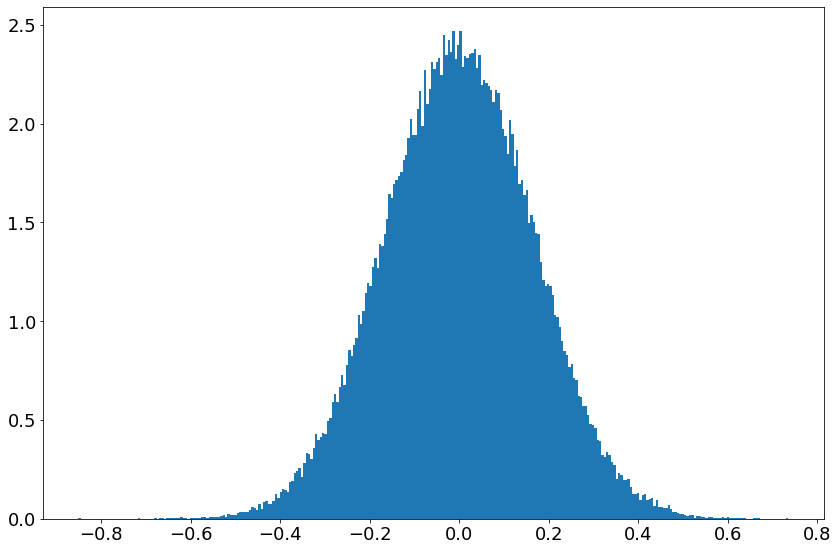

In [89]:
plt.hist(Zt[:,0], bins=300, density=True)
plt.show()

In [90]:
np.std(Zt[:,0])

0.165833617448681

In [91]:
ZtQuant = get_quantile(Zt, quantileList=[.1, .9])

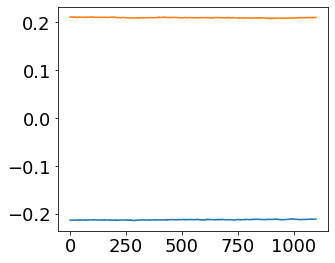

In [92]:
fig = plt.figure(figsize=(5,4))
plt.plot(ZtQuant[.1])
plt.plot(ZtQuant[.9])

In [93]:
def simulateLogConsumption(zt, dW, alpha_c, beta_c, sigma_c, dt = 1):
    _, path, time = dW.shape
    logct = np.zeros((path, time))
#     logct[:,0] = beta_c*zt[:,0]
    logc = beta_c*zt[:,0]
    for t in range(time-1):
        logc += alpha_c + beta_c*zt[:,t] + np.dot(sigma_c,dW[:,:,t])
        logct[:, t+1] = logc
    return logct

In [94]:
sigma_c = np.array([.477*2/100, 0, 0])
# alpha_c = .484*4/100
alpha_cc =  100*(.125 -  7/2*.125**2) - .05*100  - (.0095)**2/2
alpha_cc/100, alpha_cc,.477*4*.01

(0.02031204875, 2.031204875, 0.01908)

In [95]:
0.02 - (.125 -  7/2*.125**2)  + (.0095)**2/2

-0.050267374999999996

In [106]:
dW = np.random.normal(0,1,size=(3, size, 100*11))
sigma_c = np.array([.95, 0, 0])/np.sqrt(100)
logCt = simulateLogConsumption(Zt, dW, 2/100, 4/100, sigma_c)

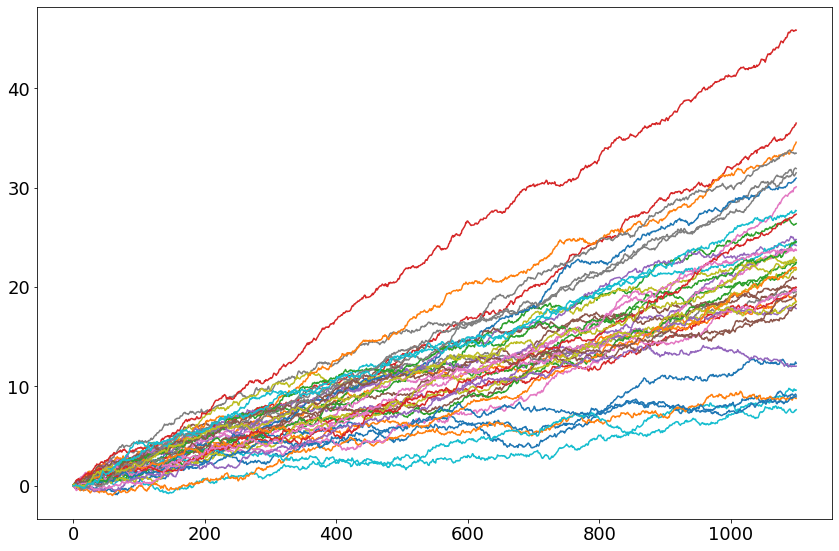

In [107]:
for i in range(40):
    plt.plot(logCt[i])

In [108]:
Zt[0,:3]

array([0.20565398, 0.20726311, 0.20029704])

In [109]:
sigma_z = np.array([.022, .05, 0])
np.dot(sigma_z, dW[:, 0, :3])

array([-0.08531083,  0.00880374,  0.01614629])

In [110]:
logCtQuantile = get_quantile(logCt, quantileList=[.1, .9])

In [111]:
logCtQuantile[.1]

array([ 0.        , -0.10292375, -0.13407367, ..., 12.56918404,
       12.58384564, 12.5960584 ])

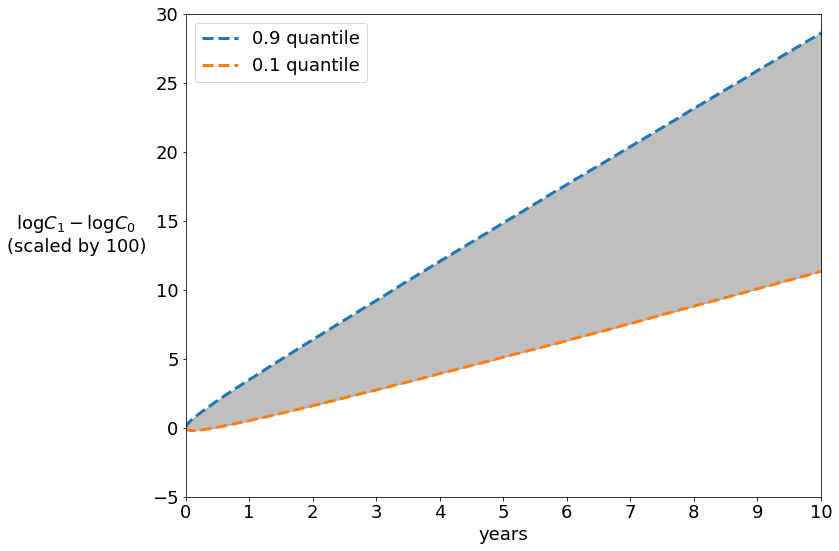

In [118]:
for quantile in [.9, .1]:
    plt.plot(logCtQuantile[quantile], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=3)

plt.fill_between(x=np.arange(0,11*100), y1=logCtQuantile[.1], y2=logCtQuantile[.9], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-5,30)
plt.xlim(0,10*100)
plt.xticks(np.arange(0,11*100, 100), [i for i in range(11)])
plt.savefig("consumption_growth10.png")

In [101]:
logCtQuantile[.1][10*100]

11.33058387665004

In [48]:
import pandas as pd

In [45]:
arry = np.array([logCtQuantile[.1][:11],logCtQuantile[.9][:11]])

In [46]:
arry.shape

(2, 11)

In [49]:
print('quantiles for logCt')
pd.DataFrame(arry, index=[".1 quantile", ".9 quantile"]).round(2)

quantiles for logCt


,0,1,2,3,4,5,6,7,8,9,10
.1 quantile,0.0,-0.18,-0.21,-0.21,-0.21,-0.19,-0.18,-0.15,-0.13,-0.11,-0.08
.9 quantile,0.0,0.34,0.53,0.69,0.85,1.00,1.14,1.28,1.42,1.55,1.69


In [ ]:
zarray = np.array([ZtQuant[.1], ZtQuant[.9]])

In [ ]:
print('quantiles for z')
pd.DataFrame(zarray[:,:11], index=[".1 quantile", ".9 quantile"]).round(2)

In [ ]:
np.quantile(dW[0,:,0], .1)

In [ ]:
dW.shape

In [ ]:
.02 + .04*(-.42) + .019*(-1.3)

In [ ]:
np.std(dW[0,:,0])

In [ ]:
np.std(Zt[:,50])

In [ ]:
Zt[0][:3]

In [ ]:
dW[:,0,0][0]*sigma_z[0] + dW[:,0,0][1]*sigma_z[1]

In [ ]:
np.dot(sigma_z, dW[:,0, :3])

In [ ]:
dW[:,0,1][0]*sigma_z[0] + dW[:,0,1][1]*sigma_z[1]

In [ ]:
 0.02224217*(1 - .056) + dW[:,0,0][0]*sigma_z[0] + dW[:,0,0][1]*sigma_z[1]

In [ ]:
(0.02224217*.04 + .0203 +  dW[:,0,0][0]*sigma_c[0])  -0.1323532*.04 + .0203 + dW[:,0,1][0]*sigma_c[0]

In [ ]:
logCt[0,:3]

In [ ]:
arry10 = np.array([logCtQuantile[.1][-11:],logCtQuantile[.9][-11:]])

In [ ]:
(pd.DataFrame(arry10)).round(2)

In [ ]:
for quantile in [.9, .1]:
    plt.plot(logCtQuantile[quantile], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=4)

plt.fill_between(x=np.arange(0,102), y1=logCtQuantile[.1], y2=logCtQuantile[.9], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-50,300)
plt.xlim(0,100)
# plt.savefig("consumption_growth100.png")

# Quarterly simulation

In [ ]:
alpha_c = .484
alpha_c
dWW = np.random.normal(0, 1, size = (2, 2_000_000, 42))

In [ ]:
np.sqrt((.011**2 + .025**2)/(1 - (1-0.014)**2))

In [ ]:
sigma_zz = np.array([.011, .025])
ZZ0 = np.random.normal(0, .163, size=(2_000_000))
ZZt = simulate_z(dWW, ZZ0, 0, .014, sigma_zz)

In [ ]:
ZZtQuant = get_quantile(ZZt, quantileList=[.1,.9])

In [ ]:
plt.plot(ZZtQuant[.1])
plt.plot(ZZtQuant[.9])

In [ ]:
sigma_c = np.array([.477, 0])
alpha_c =.484
logCCt = simulateLogConsumption(ZZt, dWW, .484, 1, sigma_c, dt = 1/4)

logCCtQuantile = get_quantile(logCCt, quantileList=[.1, .9])

In [ ]:
logCCt[:,0]

In [ ]:
logCCt.shape

In [ ]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile][:5], label="{} quantile".format(quantile) , color="black", linestyle="dashed", linewidth=3)

plt.fill_between(x=np.arange(0,5), y1=logCCtQuantile[.1][:5], y2=logCCtQuantile[.9][:5], color="gray", alpha=.5)
# plt.legend()
plt.xlabel('Quarters')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
# plt.ylim(-5,30)
# plt.xlim(0,40)
# plt.savefig('consumption_growth010.png')

In [ ]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile], label="{} quantile".format(quantile) , color="black", linestyle="dashed", linewidth=2)

plt.fill_between(x=np.arange(0,42), y1=logCCtQuantile[.1], y2=logCCtQuantile[.9], color="gray", alpha=.5)
# plt.legend()
plt.xlabel('Quarters')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
plt.ylim(-5,30)
plt.xlim(0,40)
# plt.savefig('consumption_quarter.png')

In [ ]:
logCCtQuantile[.1][4], logCCtQuantile[.9][4]

In [ ]:
years = np.array([i*4 for i in range(10+1)])
years

In [ ]:
print('logCt quantiles for 10 years, quarterly simulation')
pd.DataFrame([logCCtQuantile[.1][years], logCCtQuantile[.9][years]], index=['.1 quantile', '.9 quantile']).round(2)

In [ ]:
print('logCt quantiles for first 4 quarters')
pd.DataFrame([logCCtQuantile[.1][:5], logCCtQuantile[.9][:5]], index=['.1 quantile', '.9 quantile'], 
             columns=["0", 'quarter 1', 'quarter 2', 'quarter 3 ', 'quarter 4' ]).round(3)

In [ ]:
ZZtQuant = get_quantile(ZZt, quantileList=[.1,.9])

In [ ]:
print('z quantiles for 10 years, , quarterly simulation')
pd.DataFrame([ZZtQuant[.1][years], ZZtQuant[.9][years ]], index=['.1 quantile', '.9 quantile']).round(2)

In [ ]:
for quantile in [.9, .1]:
    plt.plot(logCCtQuantile[quantile][:10], label="{} quantile".format(quantile) , linestyle="dashed", linewidth=4)

plt.fill_between(x=np.arange(0,10), y1=logCCtQuantile[.1][:10], y2=logCCtQuantile[.9][:10], color="gray", alpha=.5)
plt.legend()
plt.xlabel('years')
plt.ylabel('$\logC_1 - \logC_0$ \n(scaled by 100)', rotation=0, labelpad=75)
# plt.savefig('consumption_growth0100.png')

# Compute implied distortion for logk, z and n
$$
\sigma_k' h^* = - \frac{v_k \sigma_k'\sigma_k + \frac{d \psi (z)}{dz} \cdot \sigma_k' \sigma_z}{\xi_m}
$$
where
$$
v_k = 1 - \eta
$$

Extract k, y and min-max problem:
$$
\delta \phi(r) + \delta \psi(z) =  \delta[(1 - \eta) \log{(\alpha - i^*)} + \eta \log{e^*} - \iota_1 z] - \frac{\xi_m}{2} (h^*)'h^* + v_k(\mu_k(z) + i^* - \frac{\kappa}{2}(i^*)^2 - \sigma_k^2/2 ) + v_y'\Theta e^* - \frac{d\phi}{dr}e^* + \frac{d\psi}{dz}\mu_z(z) + \frac{1}{2}trace(\sigma_z' \frac{d^2 \psi}{dz^2} \sigma_z) 
$$

set
$$
\tau_1 = - v_y'\Theta = median * \gamma_{base}
$$

In equilibrium $e^*$ satisfies:
$$
- \tau_1 e^*  - \frac{d\phi}{dr}e^* =   \tau_2 (e^*)^2 - \delta \eta 
$$

The ODE:
$$
\delta \psi(z) =   - \frac{\frac{d\psi}{dz} v_k (\sigma_k'\sigma_z + \sigma_z'\sigma_k ) + (\frac{d\psi}{dz})^2 \sigma_z'\sigma_z }{2\xi_m} + \frac{d\psi}{dz} \mu_z(z)  + \frac{1} {2}\frac{d^2 \psi}{dz^2}\sigma_z' \sigma_z + \delta[(1 - \eta) \log{(\alpha - i^*)}  - \iota_1 z]  + v_k(\mu_k(z) + i^* - \frac{\kappa}{2}(i^*)^2 - \sigma_k^2/2 )
$$

Temporarily set $\iota_2 = 0$

The $\psi(z)$ is linear in $z$:
$$
\psi(z) = v_z z + v_0
$$

If we know that $\psi(z) = v+z\cdot z + v_0$

coefficient of z should be 0:

$$
 - \delta v_z z  +  v_k\cdot (\beta_k - \iota_2) z + v_z\cdot(- \beta_z z) = 0 
$$

$$
- \delta v_z z - .056 v_z z  + .01 (1 - \eta)z = 0
$$

$$
\begin{aligned}
 v_z = \frac{.04(1 - \eta)}{\delta + .056}
\end{aligned}
$$
Thus
$$
v_z = \frac{ -\delta \iota_2  + v_k \beta_k}{\delta + \kappa} = (1 - .032)\cdot .04 /(.008 + .056)
$$

In [119]:
def plot_quantile(quantDict, quantileList = [.1, .33, .5, .67, .9]):
    for quantile in reversed(quantileList):
        plt.plot(quantDict[quantile], label="{} quantile".format(quantile))
    plt.legend()

In [259]:
sigma_k = np.array([.0095, 0, 0])
sigma_z = np.array([.022, .05, 0])

xi_m = .00256
i = .125
alpha = .2
eta = .032
delta = .008

In [152]:
alpha_z = 0.
beta_z = .056
sigma_z = np.array([.022, .05, 0])

In [260]:
alpha_k = -.05
beta_k = .04
kappa = 7
k0 = 80/alpha
sigma_k = np.array([.0095, 0, 0])

In [261]:
v_z = beta_k*(1 - eta)/(delta + beta_z)
v_k = 1 - eta
v_z, v_k

(0.605, 0.968)

In [194]:
y = (v_k*sigma_k + v_z*sigma_z)

In [204]:
xi = np.sqrt(np.sum(y**2/2)/(.1**2/2 ))
xi

0.37703879588180306

In [262]:
h_raw = - (v_k*sigma_k + v_z*sigma_z)/xi_m
h_raw                                                                     

array([ -8.79140625, -11.81640625,  -0.        ])

In [206]:
h_q = - (v_k*sigma_k + v_z*sigma_z)/xi

In [263]:
h_capital = np.dot(sigma_k, h_raw)
h_capital

-0.08351835937499998

In [265]:
h_z = np.dot(sigma_z, h_raw)
h_z

-0.7842312499999998

In [178]:
.022*8.79 + .05*11.82

0.7843800000000001

In [192]:
x = np.zeros((size,3))
Ht = np.array([h_capital, h_z, 0])
np.sum(Ht**2/2)

0.31099698491462696

In [217]:
x[:] = h_q

In [250]:
h_z = np.dot(sigma_z, h_q)
h_z

-0.005324735867842543

In [253]:
dW = np.random.normal(0,1,size = (3, 100_000, 102))
sig_z = np.sqrt((.022**2+ .05**2)/(1 - (1-.056)**2))
print(sig_z)
z0 = np.random.normal(0, sig_z, size=(size))
Z_d = simulate_z(dW, 0, 0, 0.056, sigma_z, x.T)
ZtQuant_d = get_quantile(Z_d, quantileList=[.1, .9])

0.1655607044403692


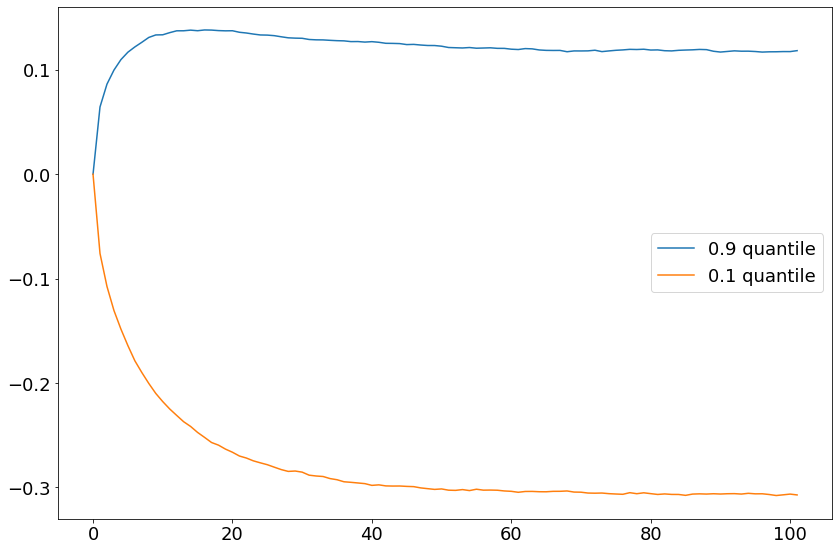

In [254]:
plot_quantile(ZtQuant_d, quantileList=[.1, .9])

In [255]:
alpha_k, beta_k,sigma_k

(-0.05, 0.04, array([0.0095, 0.    , 0.    ]))

In [256]:
logK_d = simulate_logkapital(.125, dW, Z_d, alpha_k, beta_k, sigma_k, kappa, k0, x.T)
logKQuant_d = get_quantile(logK_d)

Text(0, 0.5, '$\\log{K_t}$')

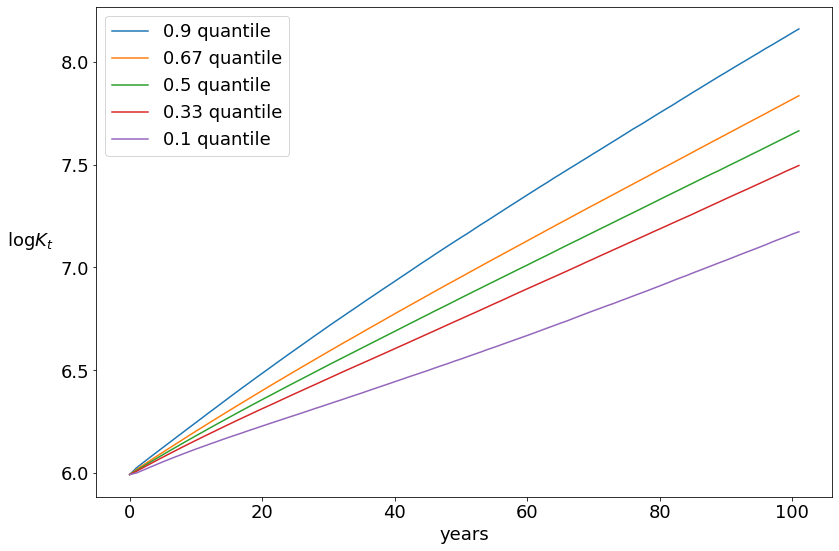

In [257]:
plot_quantile(logKQuant_d)
plt.xlabel("years")
plt.ylabel(r'$\log{K_t}$', rotation=0, labelpad=30)
# plt.title('SCC, no damage')

In [258]:
logC = simulateLogConsumption(Z_d, dW, alpha_cc, 4, sigma_c, dt = 1)
logCQuant = get_quantile(logC)

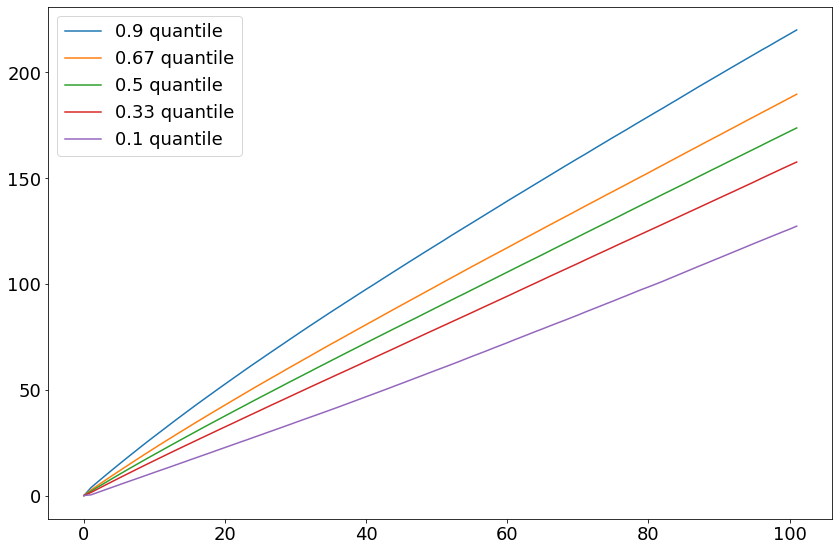

In [249]:
plot_quantile(logCQuant)

In [ ]:
sigma_n = np.array([0, 0, 1.2])
log_n = simulate_logn_withdrift(e_base_102, λ_base/1000, sigma_n, dW, h_hat_base)

In [ ]:
log_n_quantile = get_quantile(log_n)

In [ ]:
plot_quantile(log_n_quantile)
plt.show()

In [ ]:
SCC_1 = simulate_scc_non(invkap, logK_d, e_base_102, log_n, alpha, delta, eta )

SCC_2 = simulate_scc(invkap, logK_d, e_base_102, log_n, alpha, delta, eta )

SCC1Quant = get_quantile(SCC_1)
SCC2Quant = get_quantile(SCC_2)

In [ ]:
mpl.rcParams['lines.linewidth'] = 3

fig = plt.figure(figsize = (26,26))
# plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
plt.suptitle("With drift distortion", fontsize=40)
sub1 = fig.add_subplot(5,3,1) # two rows, two columns, fist cell
plot_quantile(ZtQuant_d, quantileList=[.1, .9])
plt.title('z')

sub1 = fig.add_subplot(5,3,2)
plot_quantile(logKQuant_d)
plt.title('$\logK_t$')
sub1 = fig.add_subplot(5,3,3)
plot_quantile(log_n_quantile)
plt.title('$\logN_t$')

sub2 = fig.add_subplot(5,3,(4,9))
plot_quantile(SCC2Quant)
plt.title('$SCC1$, (without $N_t*$ in the denominator)')

# sub2 = fig.add_subplot(5,3,(10,15))
# plot_quantile(SCC2Quant)
# plt.title('$SCC2$, (with $N_t*$ in the denominator)')
# plt.xlabel('years')
# # plt.savefig('With_distortion.png')